# Deep Learning Algoritmaları ile Fotoğraflardaki Nesneleri Tanıma ve Sınıflandırma Projesi

<IMG src="deep7.png" width="750" height="180">
    
    

In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Datasetimizi (cifar10 verisetini) yüklüyoruz: (Yükleme işlemi için Internet bağlantınızın olması gerekiyor). Eğer bağlantınız yoksa  veri setini Internetten indirip de yükleyebilirsiniz..

In [25]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


In [3]:
X_train.shape

(50000, 32, 32, 3)

#### Her bir fotoğraf 32 pixele-32 pixel kare boyutunda ve renkli 3 kanal RGB bilgileri olduğu için arrayımız bu şekilde..

<IMG src="cifar10_images.jpg" width="400" height="400">


In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

y_train ve y_test 2 boyutlu bir array olarak tutuluyor cifar10 verisetinde. 
Biz bu verileri görsel olarak daha rahat anlamak için tek boyutlu hale getiriyoruz.
2 boyutlu bir arrayi (sadece tekbir boyutunda veri var diğer boyutu boş olan tabi) tekboyutlu hale geitrmek için reshape() kullanıyoruz..

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
y_test 

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

#### Verilere bir göz atalım. bu amaçla kendimiz bir array oluşturuyoruz: 

In [8]:
resim_siniflari = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])        
    plt.xlabel(resim_siniflari[y[index]])
    plt.show()


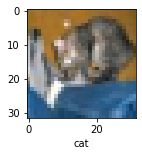

In [10]:
plot_sample(X_test, y_test, 0)

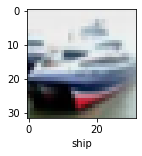

In [11]:
plot_sample(X_test, y_test, 1)

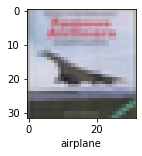

In [12]:
plot_sample(X_test, y_test, 3)

### Normalization

Verilerimizi normalize etmemiz gerekiyor. Aksi takdirde CNN algoritmaları yanlış sonuç verebiliyor. Fotoğraflar RGB olarak 3 kanal ve her bir pixel 0-255 arasında değer aldığı için normalization için basitçe her bir pixel değerini 255'e bölmemiz yeterli..

In [13]:
X_train = X_train / 255
X_test = X_test / 255

### Deep Learning Algoritmamızı CNN - Convolutional Neural Network Kullanarak Tasarlıyoruz:

In [14]:
deep_learning_model = models.Sequential([
    # İlk bölüm Convolution layer.. Bu kısımda fotoğraflardan tanımlama yapabilmek için özellikleri çıkarıyoruz...
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # İkinci bölüm klasik Articial Neural Network olan layerımız.. Yukarıdaki özelliklerimiz ve training bilgilerine
    # göre ANN modelimizi eğiteceğiz..
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
deep_learning_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Modelimizi eğitmeye başlayalım artık...

In [16]:
deep_learning_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 29s 19ms/step - loss: 1.4744 - accuracy: 0.4712
Epoch 2/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1135 - accuracy: 0.6130
Epoch 3/5
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9879 - accuracy: 0.6593
Epoch 4/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9040 - accuracy: 0.6864
Epoch 5/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8417 - accuracy: 0.7096


In [17]:
deep_learning_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9484 - accuracy: 0.6778


[0.9484208822250366, 0.6777999997138977]

In [18]:
y_pred = deep_learning_model.predict(X_test)
y_pred[:3]

array([[1.15904540e-01, 4.76926594e-04, 6.84496835e-02, 4.41703856e-01,
        4.38858056e-03, 1.79675698e-01, 7.06185400e-02, 5.42622525e-04,
        1.13234565e-01, 5.00500482e-03],
       [1.97112709e-02, 4.07467335e-02, 4.32840279e-05, 3.92761012e-06,
        1.35496539e-05, 9.78707135e-07, 2.42389802e-07, 2.34234813e-06,
        9.37596858e-01, 1.88078498e-03],
       [4.97447364e-02, 5.40828332e-02, 3.10365064e-03, 8.91903474e-04,
        2.01905053e-03, 1.66201164e-04, 5.49872711e-05, 1.49843260e-03,
        8.62546325e-01, 2.58919019e-02]], dtype=float32)

In [19]:
y_predictions_siniflari = [np.argmax(element) for element in y_pred]
y_predictions_siniflari[:3]

[3, 8, 8]

In [20]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

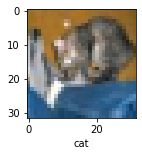

In [22]:
plot_sample(X_test, y_test,0)

In [23]:
resim_siniflari[y_predictions_siniflari[0]]

'cat'

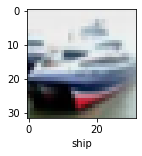

In [24]:
plot_sample(X_test, y_test,1)

In [25]:
resim_siniflari[y_predictions_siniflari[1]]

'ship'

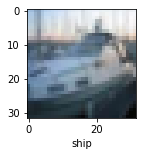

In [26]:
plot_sample(X_test, y_test,2)

In [27]:
resim_siniflari[y_predictions_siniflari[2]]

'ship'

In [42]:
deep_learning_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = deep_learning_model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7888 - accuracy: 0.7261 - val_loss: 0.9289 - val_accuracy: 0.6810
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7439 - accuracy: 0.7427 - val_loss: 0.9147 - val_accuracy: 0.6895
Epoch 3/20
1563/1563 [==============================] - 23s 14ms/step - loss: 0.7031 - accuracy: 0.7563 - val_loss: 0.8960 - val_accuracy: 0.7059
Epoch 4/20
1563/1563 [==============================] - 23s 14ms/step - loss: 0.6643 - accuracy: 0.7705 - val_loss: 0.9219 - val_accuracy: 0.6900
Epoch 5/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.6306 - accuracy: 0.7810 - val_loss: 0.9334 - val_accuracy: 0.6948
Epoch 6/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.5967 - accuracy: 0.7914 - val_loss: 0.9588 - val_accuracy: 0.6862
Epoch 7/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.5730 - accuracy: 0.8000 - val_loss: 0.9507 -

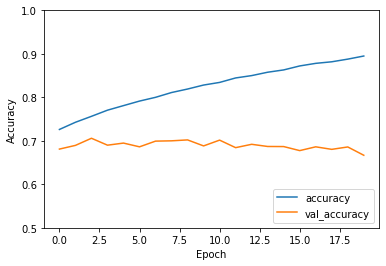

In [43]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')